In [4]:
from scipy.io import arff
import matplotlib.pyplot as plt

data=arff.loadarff(open('./artificial/2d-10c.arff','r'))


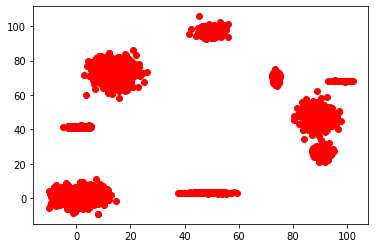

In [20]:
listX = []
listY=[]
for point in data[0]:
    listX.append(point[0])
    listY.append(point[1])
plt.plot(listX,listY, 'ro')
plt.show()

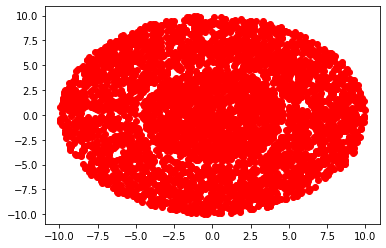

In [21]:
from scipy.io import arff
import matplotlib.pyplot as plt

data=arff.loadarff(open('./artificial/disk-4500n.arff','r'))
listX = []
listY=[]
for point in data[0]:
    listX.append(point[0])
    listY.append(point[1])
plt.plot(listX,listY, 'ro')
plt.show()


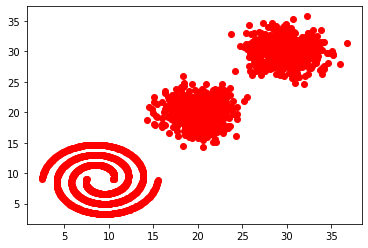

In [71]:
from scipy.io import arff
import matplotlib.pyplot as plt

data=arff.loadarff(open('./artificial/2sp2glob.arff','r'))
listX = []
listY=[]
for point in data[0]:
    listX.append(point[0])
    listY.append(point[1])
plt.plot(listX,listY, 'ro')
plt.show()

In [72]:
import random
nb_cluster_k = 3
listCluster=[]
for cluster in range(nb_cluster_k):
    random_center = random.randrange(0,len(listX)-1)
    listCluster.append([(listX[random_center],listY[random_center])])
print(listCluster)


[[(17.17426, 17.6251)], [(20.129431, 20.0423)], [(7.45688, 8.854132)]]


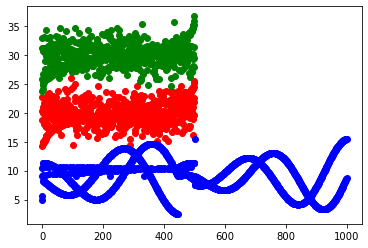

In [73]:
import sys
import math
import random

nb_cluster_k = 3
listCluster=[]
for cluster in range(nb_cluster_k):
    random_center = random.randrange(0,len(listX)-1)
    listCluster.append([(listX[random_center],listY[random_center])])

for point in data[0]:
    best_dist = sys.maxsize
    best_cluster = -1
    for center in range(len(listCluster)):
        dist = math.dist((point[0],point[1]),(listCluster[center][0][0],listCluster[center][0][1]))
        if best_dist > dist: 
            best_dist=dist
            best_cluster=center
    listCluster[best_cluster].append((point[0],point[1]))
    
plt.plot(listCluster[0],'ro')
plt.plot(listCluster[1],'bo')
plt.plot(listCluster[2],'go')
plt.show();
        

0.5542388039415036

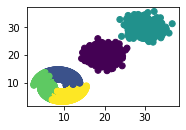

In [127]:
from sklearn.cluster import KMeans
import numpy as np
X = []
n_samples=1500
for point in data[0]:
    X.append([point[0],point[1]])
X=np.array(X)
kmeans = KMeans(n_clusters=5, random_state=0).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=kmeans)
metrics.silhouette_score(X, kmeans, metric='euclidean')

In [125]:
from sklearn import metrics
find = False
nb_cluster = 2
metric_best = 0
limit=20
iteration = 0
while(not find & (iteration < limit)):
    kmeans = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(X)
    find_metric = metrics.silhouette_score(X, kmeans, metric='euclidean')
    if find_metric > metric_best:
        metric_best=find_metric
        nb_cluster+=1
    else:
        find=True
    
    iteration+=1
print(nb_cluster)

4
